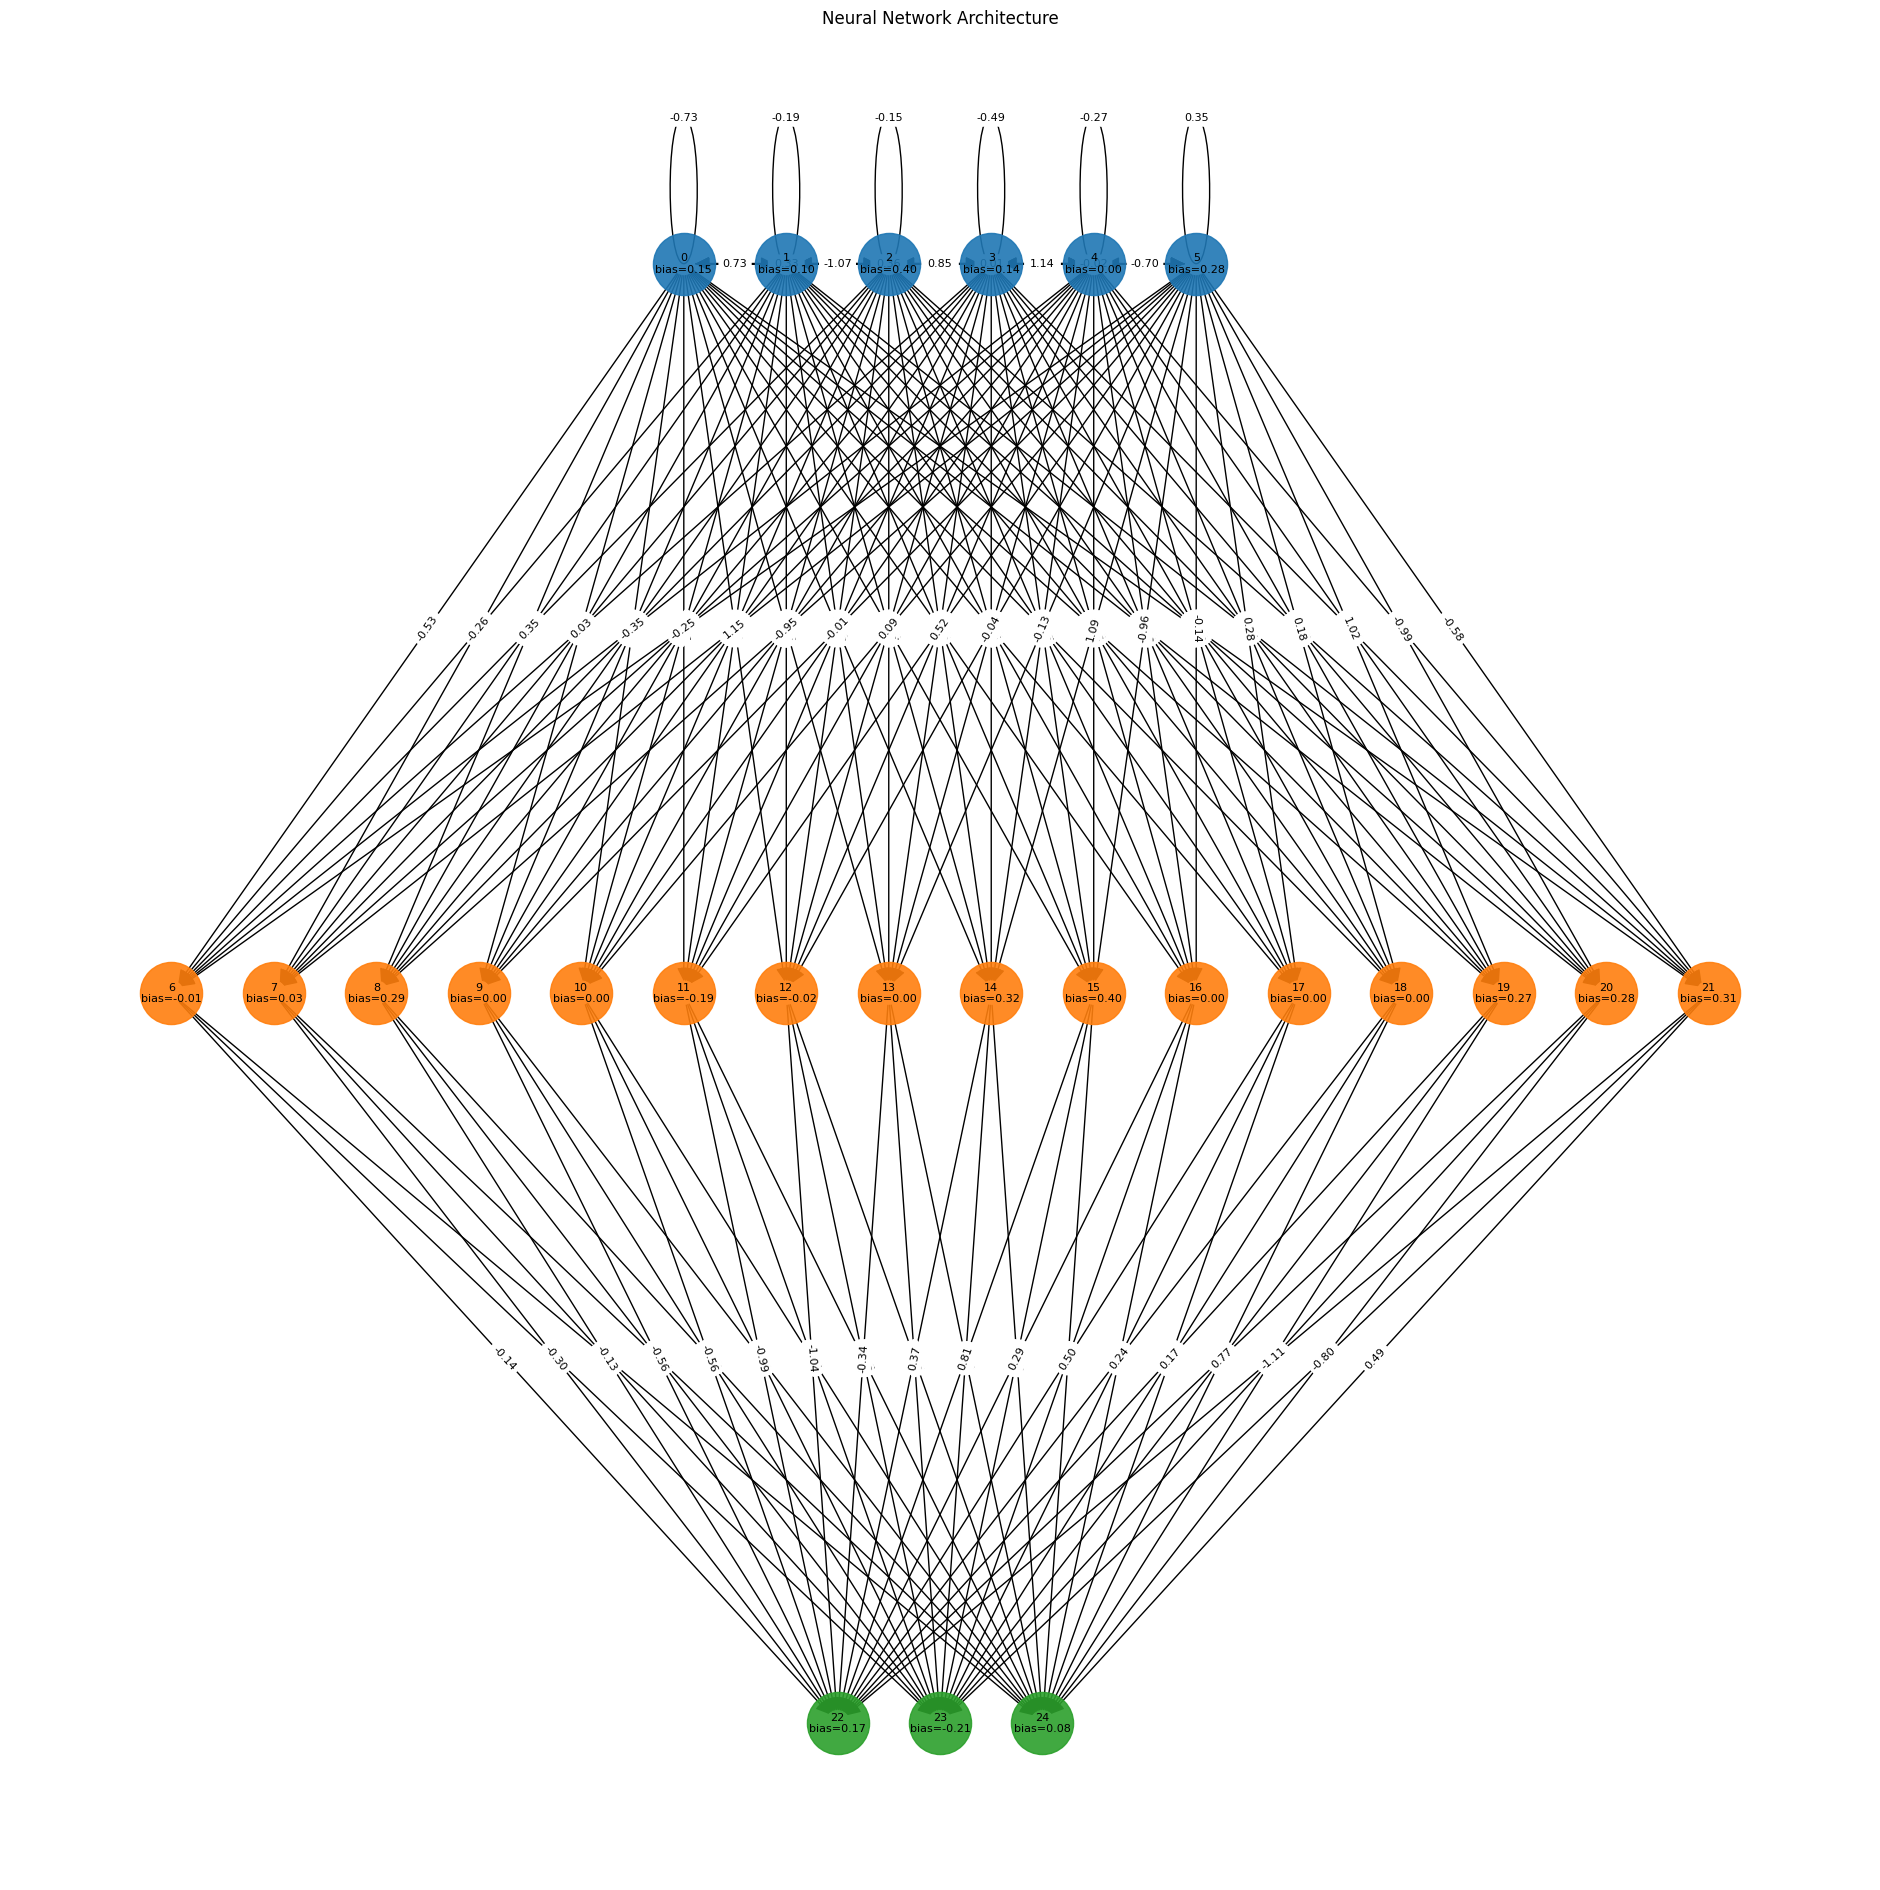

In [9]:

#import load_model
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import networkx as nx

# Define a simple Sequential model
model = load_model('model_with_noglass.keras')

# Visualize the model architecture
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture plot
#img = plt.imread('model.png')
#plt.figure(figsize=(10, 10))
#plt.imshow(img)
#plt.axis('off')
#plt.show()
weights = []
for layer in model.layers:
    if isinstance(layer, Dense):
        weights.append(layer.get_weights())

# Step 4: Visualize the network
def visualize_network(weights, layer_names):
    G = nx.DiGraph()

    # Adding nodes
    node_count = 0
    layer_nodes = []
    node_biases = {}  # Dictionary to hold node biases
    for i, (w, b) in enumerate(weights):
        layer_node_count = w.shape[1]
        current_layer_nodes = [node_count + j for j in range(layer_node_count)]
        layer_nodes.append(current_layer_nodes)
        for node, bias in zip(current_layer_nodes, b):
            node_biases[node] = bias  # Assign bias to node
        node_count += layer_node_count

    # Adding edges (same as before)
    for i, (w, b) in enumerate(weights):
        input_nodes = layer_nodes[i - 1] if i > 0 else range(w.shape[0])
        output_nodes = layer_nodes[i]
        for j, output_node in enumerate(output_nodes):
            for k, input_node in enumerate(input_nodes):
                G.add_edge(input_node, output_node, weight=w[k, j])

    # Manually set positions (same as before)
    pos = {}
    layer_distances = 3.5
    node_vertical_pos = 0
    for i, layer in enumerate(layer_nodes):
        num_nodes = len(layer)
        x_spacing = 2
        x_offset = -x_spacing * (num_nodes - 1) / 2
        for j, node in enumerate(layer):
            pos[node] = (x_offset + j * x_spacing, node_vertical_pos)
        node_vertical_pos -= layer_distances

    plt.figure(figsize=(24, 24))

    # Draw nodes with different colors for each layer (same as before)
    for i, nodes in enumerate(layer_nodes):
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=f'C{i}', node_size=2000, alpha=0.9)

    # Draw edges (same as before)
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='black')
    
    # Draw labels with bias values
    node_labels = {node: f'{node}\nbias={bias:.2f}' for node, bias in node_biases.items()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')

    # Draw edge labels (weights) (same as before)
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Neural Network Architecture")
    plt.axis('off')
    plt.savefig('model.png')
    plt.show()


layer_names = [layer.name for layer in model.layers if isinstance(layer, Dense)]
visualize_network(weights, layer_names)